# The Gaussian Plume Model

#### Maarten Krol & Antonija Rimac (Version 1.1, April, 2020)

The Gaussian Plume Model (GPM) is a widely used tool in air pollution applications. Basically, the model is used to estimate the downwind air pollution concentrations, given information about the pollutant emissions and the nature of the atmosphere. GPMs form the basis for permits that are granted to large facilities to emit "smelly" or toxic compounds. But GPMs also form the basis of the Dutch model OPS that calculates Nitrogen deposition on nature areas.

Everybody knows plumes from stacks or fires. An example from a large industrial explosion is given in Figure 1.

<br>
<div align=center>
<figure>
  <img src="Breda.png", width="400" height="300">
  <figcaption> <i>Figure 1: A plume from an industrial explosion in Breda 2014</i></figcaption>
</figure>
</div>

As can be seen in Figure 1, the dispersion of pollutants is strongly influenced by turbulence in the boundary layer. The goal of this practical is to better understand the GPM. Specifically we will:
* Explain the mathematical formulation of the GPM
* Investigate the influence of wind, source strength, and stack height
* Determine concentrations downwind of a stack
* Investigate the influence of the atmospheric stability
* Extend the GPM with terms for ground reflection and line sources

### 1 The Basis of the GPM

The GPM can be derived from the advection diffusion equation of a tracer. The basic concept is that concentrations downwind of a source spread laterally and vertically by turbulent motions in the atmospheric boundary layer. In a convective boundary, plumes will normally exhibit irregular behaviour, because of the strong turbulence and the large eddies that move the plume around. This can be observed in the movie below. The movie shows a result from a simulation of a plume in a slightly convective boundary layer (This is called a Large Eddy Simulation, courtesy: Chiel van Heerwaarden, MAQ). Note that we look at the plume from above, i.e., we look at the result plotted in xy-plane.

<video controls width="80%" src="movie_int.mp4" />

It is clear that we have to average over a certain time to get the stationary solution that forms the basis of the GPM. Typically, we need to average over at least 30 minutes. This also implies that if you measure the concentration downwind of a source, a single measurement does not always provide a reliable answer!
The Gaussian plume model thus represents an **average situation**.

### 2 The Gaussian Distribution

The (stationary) concentration distribution downwind of a plume is assumed to be Gaussian. Mathematically this distribution is described by:

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}}{\rm exp}\Bigg(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\Bigg) \;\;\;\;\;\; (Eq. 1)$$

where $\mu$ is the mean value, and $\sigma$ is the standard deviation. The Gaussian curve is a so-called probability density function, also called the **normal distribution**. The Gaussian distribution is normalized by $\frac{1}{\sigma \sqrt{2\pi}}$, such that the sum over all values of $x$ gives a probability of 1. 

### Exercise 2: Change in the normal distribution

Before we start, please save the notebook under 
> File > save as.. > Gauss/*yourname*.ipynb

To investigate the curve a bit more in detail, you can plot the Gaussian (normal) distribution by selecting the cell below (it will be highlighted) 

The first part of the program below is our calculation of the normal distribution. The second part presents the program in which you will change the mean and standard deviation to calculate and plot your own  normal distibution. But first, run the program (press **Shift-Enter** simultaneously in the selected cell below).

The black line of the plotted figure is the Gaussian distribution. The green dotted line indicates the **mean** of the distribution. You can think of $x$ as the average length of a Wageningen student (e.g., 173 cm). The red and blue lines represent deviations from the mean by one and two standard deviations ($\sigma$), respectively. The probablility to find a value of $x$ between the red lines is 68%. The corresponding probability for 2$\sigma$ (i.e., blue lines) is 95%. The probability to find $x$ outside the blue lines is only 5%. And of course the total area under the curve is 1 (100%).

Now you will run the program again but with your chosen values for the mean and standard deviation. Therefore, first remove the single **#** signs standing in front of every line in the program below (written below the line starting with: ## Calculate normal distribution (Exercise)), and then change the mean and standard deviation, and replot the curve by pressing **Shift-Enter** simultaneously.

Area under the curve:   1.00
Area under the curve (exercise):   1.00


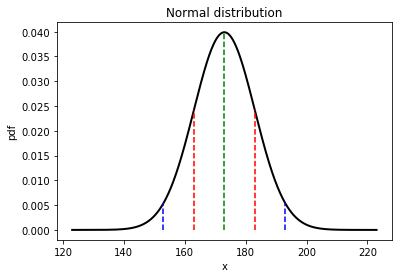

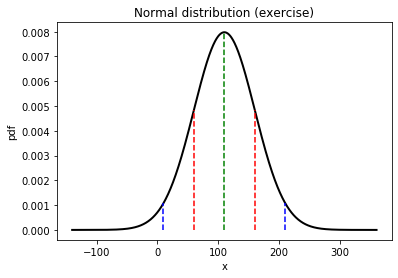

In [5]:
# Import important python libraries
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Calculate normal distribution
mu      = 173.0
sigma   = 10.0
x, step = np.linspace(mu-5*sigma, mu+5*sigma, num=1000, retstep=True)
norm    = 1./(sigma*np.sqrt(np.pi*2))
s1      = np.exp(-0.5*(1.0)**2)
s2      = np.exp(-0.5*(2.0)**2)
gauss   = norm*np.exp(-0.5*((x-mu)/sigma)**2)

# Plot normal distribution
fig1, ax = plt.subplots(1, figsize=(6,4))
ax.plot(x,gauss,'k',lw=2)
ax.plot([mu,mu],[0.0,norm],'g--' )
ax.plot([mu+sigma,mu+sigma],[0,norm*s1],'r--')
ax.plot([mu-sigma,mu-sigma],[0,norm*s1],'r--')
ax.plot([mu+2*sigma,mu+2*sigma],[0,norm*s2],'b--')
ax.plot([mu-2*sigma,mu-2*sigma],[0,norm*s2],'b--')
ax.set_ylabel('pdf')
ax.set_xlabel('x')
ax.set_title('Normal distribution')
print("Area under the curve: %6.2f"%(gauss.sum()*step))

## Calculate normal distribution (Exercise)
#mu_exercise      = 110.0
#sigma_exercise   = 50.0
#x_exercise, step_exercise = np.linspace(mu_exercise-5*sigma_exercise, 
#                                        mu_exercise+5*sigma_exercise, num=1000, retstep=True)
#norm_exercise    = 1./(sigma_exercise*np.sqrt(np.pi*2))
#s1_exercise      = np.exp(-0.5*(1.0)**2)
#s2_exercise      = np.exp(-0.5*(2.0)**2)
#gauss_exercise   = norm_exercise*np.exp(-0.5*((x_exercise-mu_exercise)/sigma_exercise)**2)

#fig2, ax = plt.subplots(1, figsize=(6,4))
#ax.plot(x_exercise,gauss_exercise,'k',lw=2)
#ax.plot([mu_exercise,mu_exercise],[0.0,norm_exercise],'g--' )
#ax.plot([mu_exercise+sigma_exercise,mu_exercise+sigma_exercise],[0,norm_exercise*s1_exercise],'r--')
#ax.plot([mu_exercise-sigma_exercise,mu_exercise-sigma_exercise],[0,norm_exercise*s1_exercise],'r--')
#ax.plot([mu_exercise+2*sigma_exercise,mu_exercise+2*sigma_exercise],[0,norm_exercise*s2_exercise],'b--')
#ax.plot([mu_exercise-2*sigma_exercise,mu_exercise-2*sigma_exercise],[0,norm_exercise*s2_exercise],'b--')
#ax.set_ylabel('pdf')
#ax.set_xlabel('x')
#ax.set_title('Normal distribution (exercise)')
#print("Area under the curve (exercise): %6.2f"%(gauss.sum()*step))

### Question 2.1: How does the plot change if we change the mean and the standard deviation?
- how does the mean change?
- how does the width of the distribution change?
- how does the peak value change?
- explain why your answers are logical.

**Your answer is:**

### Question 2.2: Inspect the Python code: How and where is the area under the curve calculated?

**Your answer is:**

The GPM model assumes that the concentration distributions (in the vertical and crosswind directions), downwind of a point emission source have the shape of a Gaussian dsitribution. So lets look at the formulation of the GPM.

### 3 The Gaussian Plume Equation

Now we will use the Gaussian function in the plume model. We consider the coordinate system as shown in Figure 2.

<br>
<div align=center>
<figure>
  <img src="Figure2.png", width="400" height="300">
  <figcaption> <i>Figure 2: Coordinate system of a Gaussian plume model</i></figcaption>
</figure>
</div>

The pollutant enters the atmosphere in the source at height $H_e$ (stack height plus plume rise). The stack is located at $x=y=0$ m. The wind $u$ blows in the $+x$ direction. As you can see, the plume-spread in the $y$ and $z$ directions (gray shading) is described by Gaussian concentration profiles. Further characteristics of the Gaussian Plume are:

* The horizontal and vertical width of the plume is described by $\sigma_y$ and $\sigma_z$.
* Depending on the atmospheric stability, $\sigma_y$ and $\sigma_z$ can have different values.
* The parameters $\sigma_y$ and $\sigma_z$ depend on $x$: the further downwind, the wider the Gaussian dsitribution.
* Since the Gaussian curve is normalized to 1, mass in the total mass inside the plume is conserved: when the plume becomes wider, the concentrations will become smaller.

The latter property implies that in every $yz$-cross-section along the $+x$ direction the same amount of plume exhaust passes and the following relation holds: 

$$ \int_y \int_z C\ u\ dy\ dz = Q \;\;\;\;\;\; (Eq. 2)$$

Here $Q$ is the source strength (in kg/s), $C$ is the atmospheric concentration (in kg/m$^3$) and $u$ is the windspeed (in m/s). Note that the variable $u$ is assumed to be constant over the domain and thus we can place it before the integral. 

The Gaussian plume model equation reads:

$$ C(x,y,z) = \frac{Q}{2 \pi\,\sigma_y\,\sigma_z\, u}{\rm exp}\left(-\frac{y^2}{2\,\sigma_y^2}\right)
{\rm exp}\left(-\frac{(z-H)^2}{2\, \sigma_z^2}\right)\;\;\;\;\;\; (Eq. 3)$$

You can verify that the atmospheric concentration $C$ at location $x, y, z$ is a function of the source strength ($Q$), effective stack height ($H$), wind ($u$), $y$, $z$, $\sigma_y$, and $\sigma_z$. As we saw in Figure 2, these latter two $\sigma$ values depend on $x$. The relation between $\sigma$ and $x$ depends on the stability of the atmosphere, which will be discussed next. 

### Question 3.1: What are the units of concentration C in eq. 3?
The units of Q are kg s$^{-1}$, x, y and H are in m.

**Your answer is:**

### 4 Influence of the atmospheric stability

Atmospheric stability describes the thermal layering of the atmosphere. This will be explained in detail in a later lecture, but here the concept will be already be introduced.

At **night**, the coldest air is near the surface, because the surface cools the air via emission of longwave (IR) radiation. Since colder air is denser, it is difficult to lift the surface air higher into the atmosphere. As a result, the atmosphere is **stable**: it is difficult to mix air vertically.

During the **day**, the sun heats the earth's surface with solar radiation. The surface heats the lower air layers, which become warmer and expands. The expanded air is less dense and has a tendency to rise up, while the colder air above it sinks towards the surface. As a result, the atmosphere is constantly mixed by turbulent motions. In this situation, we call the atmosphere **unstable**. In practise, the situation is more complex, but for now this explanation suffices.

The static stability of the atmosphere strongly determines the dispersion of air polutants. In an unstable boundary layer, plumes are constantly moved up and down by rising and sinking motions. In contrast, mixing is strongly reduced in a stable boundary layer (e.g., at night, with low winds). Figure 3 shows how plumes can behave as a function of the temperature profile in the lower atmosphere. Looping, coning, and fanning occur during respectively unstable, neutral, and stable conditions. Note that the lower three panels exhibit temperature jumps near the top of the boundary layer. Remember also that stacks are often build to release (dangerous or smelly) air pollutants at higher altitudes!

<br>
<div align=center>
<figure>
  <img src="Stability.png", width="800" height="600">
  <figcaption> <i>Figure 3: Plumes from a strack under different stabilities of the atmosphere. Note how the plume becomes wider in more unstable situations.</i></figcaption>
</figure>
</div>    

Much research has been devoted to establish relations between the parameters $\sigma_y$ and $\sigma_z$ and the atmospheric stability. In general, relations take the form:

$$\sigma_y = Fx^f \;\;\;\;\;\; (Eq.4)$$
$$\sigma_z = Gx^g \;\;\;\;\;\; (Eq.5)$$

In this equation, the parameters $F$, $G$, $f$ and $g$ depend on the stability. Today we will use parameters that are listed in Table 1.

<table>
  <caption>Table 1: Gaussian plume dispersion parameters for different atmospheric stability classes.</caption>
<tr>
<th>Stability</th>
<th>F</th>
<th>f</th>
<th>G</th>
<th>g</th>   
</tr>
<tr>
<td>Stable</td>
<td>0.31</td>
<td>0.71</td>
<td>0.06</td>
<td>0.71</td>
</tr>
<tr>
<td>Neutral</td>
<td>0.32</td>
<td>0.78</td>
<td>0.22</td>
<td>0.78</td>
</tr>
<tr>
<td>Unstable</td>
<td>0.40</td>
<td>0.91</td>
<td>0.41</td>
<td>0.91</td>
</tr>
</table>

### Exercise 4:  Atmospheric stability

In this exercise, we will look at the different atmospheric stability classes. 


### Question 4.1: What is the value of $\sigma_y$ and $\sigma_z$ at $x=1000$ m for three stability classes? Use the eqs. 4 and 5 and the parameter values in table 1.

**Your answer is:**

### Question 4.2: What are the units of $\sigma$?

**Your answer is:**

### Question 4.3: How large are the differences in $\sigma_y$ and $\sigma_z$ and how will this affect the concentrations in the plume (see figure 3)?

**Your answer is:**

### 5 Applying the Gaussian Plume Model

The following cell contains a program to run the Gaussian Plume model. It can be fully operated with sliders and drop down menus. You can set the main parameters of the GPM and determine the concentration at a receptor point (i.e., a house downwind of a stack). Moreover, $y-z$, $x-z$, and $x-y$ concentration cross-sections will be plotted. 
Activate the program by selecting the cell below and press **Shift-Enter**. Note that you should press **calculate** after changing a parameter value.


In [1]:
from plot_gauss import *
pg = plot_gauss(1)

Loading BokehJS ...

Box(children=(Box(children=(Label(value='Q : Strength of the source'), IntSlider(value=200, description=':', m…

Box(children=(Box(children=(Dropdown(description='Plume type', layout=Layout(visibility='hidden'), options=('p…

interactive(children=(ToggleButton(value=False, description='Calculate'), Output()), _dom_classes=('widget-int…

### Exercise 5: Using the Gaussian Plume model

Before you answer some questions, write down the concentration $C$ in the receptor point positioned at $x, y, z = 3000, 0, 50$ m and the values for $Q$, $H$, and $u$.

### Question 5.1: Verify the cross-section plots. Does the concentration value $C$ obtained using the program match the concentration value obtained analytically, i.e., using the GPM equation (Eq. 3)?

**Your answer is:**

### Question 5.2: Based on the GPM equation (Eq. 3), what will happen to the concentration $C$ when you double the wind-speed? 

**Your answer is:**

### Question 5.3: What will happen to the concentration $C$ when you double the source strength? Validate your answer by performing an experiment.

**Your answer is:**

### Question 5.4: The term $\int_y\int_z C\ u\ dy\ dz$ is printed above the figure. Is the value equal to the source strength (See Eq. 2)? Explain?

**Your answer is:**

Note that this will be in detail the subject of the next section.

### Question 5.5: What happens to the concentration in the receptor point when you change the stability to "neutral" and to "stable"?

**Your answer is:**

### Question 5.6: How does the plume shape change and what happens to $\sigma_y$ and $\sigma_z$ when you change the stability?

**Your answer is:**

### Question 5.7: In a stable atmosphere, what should be the height of the stack to bring the surface concentration  at $x = 3000 m$ and $z = 0 m$ below 1 $\mu$g/m$^3$? Use $Q$ = 200 kg/s and $u$ = 5 m/s.

**Your answer is:**

*Note: put the value in the chat as "The stack height is ...m" .*

### 6 Plume reflection
In the previous assignment, we sometimes "missed" part of the emitted material. This happens when the plume hits the Earth surface. The mathematical formulations does not "know" about the ground and simply extends the plume below the surface. That is where the missing material went, but it was not shown!
Only if the emitted compound is very reactive to the Earth surface (e.g. by efficient uptake), this might be a good approximation. However, mathematically it is easy to reflect the plume at the surface, as is illustrated in Figure 4.

<br>
<div align=center>
<figure>
  <img src="Figure4.png", width="600" height="400">
  <figcaption> <i>Figure 4: Concept of a plume reflecting at the surface.</i></figcaption>
</figure>
</div> 
 
This "reflection term" can be easily added to the formula:

$$ C(x,y,z) = \frac{Q}{2\pi\sigma_y\sigma_zu}{\rm exp}\left(-\frac{y^2}{2\sigma_y^2}\right)
\left( {\rm exp}\left(-\frac{(z-H)^2}{2\sigma_z^2}\right) +
{\rm exp}\left(-\frac{(z+H)^2}{2\sigma_z^2}\right)\right) \;\;\;\;\; (Eq.6)
$$

As you can verify, an extra Gaussian term is added in the $z$-direction. In the following program, this plume reflection has been activated. 

### Exercise 6: The Gaussian Plume Model + the reflection term

The following cell contains a program to run the Guassian Plume model where the reflection term is included. Activate the program by selecting the cell followed by **Shift-Enter**.

In [2]:
from plot_gauss import *
pg = plot_gauss(2)

Loading BokehJS ...

Box(children=(Box(children=(Label(value='Q : Strength of the source'), IntSlider(value=200, description=':', m…

Box(children=(Box(children=(Dropdown(description='Plume type', index=1, options=('point', 'point+reflection', …

interactive(children=(ToggleButton(value=False, description='Calculate'), Output()), _dom_classes=('widget-int…

### Question 6.1: Does the integral $\int_y\int_z C\ u\ dy\ dz$ equal the source strength $Q$ when accounting for reflection at the surface? And after changing $Q$?

**Your answer is:**

### Question 6.2: What is the  concentration enhancement at $x,y,z = 1000, 10, 90$ m in unstable, neutral, and stable atmospheric conditions when a stack with a height of 90 m emits 5 kg CO$_2$ per second? The wind speed is 8 m/s.

**Your answer is:**

### Question 6.3: What is the  concentration enhancement at $x,y,z = 1000, 10, 0$ m in unstable, neutral, and stable atmospheric conditions when a stack with a height of 90 m emits 5 kg CO$_2$ per second? The wind speed is 8 m/s.

**Your answer is:**

### Question 6.4: Can you explain the differences between the questions 6.2 and 6.3?

Discuss your conclusion based on 1D plots (activate the 1D tickbox).

**Your answer is:**

### 7 The line source

The final extension we make is to consider a line source. Roads are an important example of line sources. In the line source model the unit of emission changes to kg/(ms): the emission of pollutants (e.g., NO) per second and **per m road**. This emission can be deduced from the traffic density. The line source is placed along the $y$-axis. As a result, dispersion in the y-direction disappears from the Gaussan plume model:


$$ C(x,y,z) = \frac{Q}{\sqrt{2\pi}\sigma_zu}
\left( {\rm exp}\left(-\frac{(z-H)^2}{2\sigma_z^2}\right) +
{\rm exp}\left(-\frac{(z+H)^2}{2\sigma_z^2}\right)\right)
$$

### Exercise 7: The line source in the Gaussian Plume Model

In the following program, we will work with a line source. We will consider receptor points that are located downwind of a highway. Advanced options have been activated that allow for adapting the calculation grid. Note that surface reflection is still activated. Activate the program by selecting the cell followed by **Shift-Enter**

In [3]:
from plot_gauss import *
pg = plot_gauss(3)

Loading BokehJS ...

Box(children=(Box(children=(Label(value='Q : Strength of the source'), IntSlider(value=1, description=':', max…

Box(children=(Box(children=(Dropdown(description='Plume type', index=2, options=('point', 'point+reflection', …

interactive(children=(ToggleButton(value=False, description='Calculate'), Output()), _dom_classes=('widget-int…

### Question 7.1: Can you verify the units of the line source model and check if the intregral $\int_z C\ u\ dz$ equals the source strength $Q$?

**Your answer is:**

### Question 7.2: How does the concentration at $x, z=1000, 2$ m depend on the atmospheric stability?

**Your answer is:**

### 8 Extra: CO$_2$ vertical profiles at Cabauw

The measurement tower at Cabauw is located 10560 m to the South-West of the highway A2. See Figure 5.
The highway emits 1 kg CO$_2$ per second per m highway. Do to turbulence generated by traffic, we assume an effective emission height of 5 m.

<br>
<div align=center>
<figure>
  <img src="Cabauw.png", width="600" height="400">
  <figcaption> <i>Figure 5: From Google Maps: the location of Cabauw with respect to the A2.</i></figcaption>
</figure>
</div>

The wind from the NE (5 m/s) blows straigt from the highway (in the East) to Cabauw (in the West). At Cabauw, the CO$_2$ concentration is monitored at 10, 40, 80, 140, and 200 m along the tower.

### Exercise 8: Profiles Along the Cabauw tower

Based on experiements with the line source model, sketch expected CO$_2$ concentration profiles along the Cabauw tower for unstable, neutral, and stable conditions.